In [1]:
import pandas as pd
import os

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

In [4]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

In [4]:
from sklearn.model_selection import train_test_split

## Displacement

In [7]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80% REAL/Final second time/newfiles" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

Loading file: 1-1000 RESULTS 2 new.xlsx
Loading file: 1001-2000 RESULTS 2 new.xlsx
Loading file: 2001-3000 RESULTS 2 new.xlsx
Loading file: 3001-3500 RESULTS 2 new.xlsx
Loading file: 3501-4500 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
4500,36.57623,43.44477,6.58442,34.24018,14.02638,31.23537,28.97889,174.78,15.08,-1.085
4501,18.67904,39.76590,6.43358,37.59854,11.88424,16.48825,25.74947,187.95,15.03,-1.033
4502,18.27380,34.89349,8.67097,34.69962,15.81196,19.46441,36.93303,184.57,17.20,-1.038
4503,17.94913,37.79538,7.37247,37.37619,24.63649,39.67006,31.63889,174.09,15.26,-1.060


In [9]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80% REAL/Final second time" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2

Loading file: 4501-5000 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,43.234,20.075,6.765,33.040,13.756,21.784,17.480,175.13,12.88,-1.092
1,44.125,32.896,7.134,37.219,29.655,43.020,31.617,157.11,15.31,-1.173
2,40.424,29.486,8.721,37.427,23.588,36.297,30.641,165.04,15.49,-1.122
3,30.442,24.137,7.348,32.985,22.093,37.199,37.782,171.85,16.02,-1.072
4,43.740,31.790,8.113,39.019,15.258,22.693,39.000,171.99,15.93,-1.131
...,...,...,...,...,...,...,...,...,...,...
496,25.001,21.234,6.133,31.444,21.458,31.909,27.892,177.79,15.23,-1.049
497,16.609,27.831,6.183,34.947,13.032,33.838,28.706,182.40,15.29,-1.036
498,28.948,29.888,6.718,34.951,27.799,40.112,30.893,168.71,15.07,-1.080
499,48.392,29.947,9.569,38.304,22.077,41.102,39.719,156.86,15.74,-1.201


In [10]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,177.79,15.23,-1.049
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,182.40,15.29,-1.036
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,168.71,15.07,-1.080
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,156.86,15.74,-1.201


In [11]:
disp_data=all_data.drop(columns=['Mass2', 'Stress1'])
disp_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,-1.120
...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,-1.049
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,-1.036
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,-1.080
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,-1.201


In [12]:
XD = disp_data[['diamond','ellipse_to_front','back_hole','ellipse_to_bottom','ellipse','corner','diamond_to_back']]  # multiple features
yD = disp_data['Displacement1']
XD

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718
...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900


In [13]:
# creating train and test sets 
XD_train, XD_test, yD_train, yD_test = train_test_split(XD, yD, test_size=0.3, random_state=4294967295) 
XD_train

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
1665,42.50469,36.61893,8.08296,38.12992,10.43905,28.37854,33.00908
3298,27.03313,36.01281,6.36827,33.23261,17.92542,28.88550,33.59603
1159,40.20438,25.62784,8.92328,33.50185,21.92112,25.07093,35.52426
2427,34.41511,28.66540,9.64022,34.56632,23.67905,40.36236,32.12540
2815,16.84994,21.38174,7.13900,31.57898,11.12091,44.16331,26.03544
...,...,...,...,...,...,...,...
4310,28.56821,33.89235,6.17383,34.63928,25.89579,33.43126,28.70429
3143,46.13305,34.45332,9.59585,37.97209,26.25773,23.50574,26.80588
3084,23.49270,35.64826,8.17273,31.83567,18.90538,16.05584,19.49901
290,36.91804,22.12011,9.43116,36.50395,13.59110,22.70356,31.05268


In [14]:
XD_test

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
4149,45.50346,33.93694,9.01203,32.11394,18.76289,30.38624,24.67282
3666,26.29032,21.13185,9.03312,34.51807,9.86251,23.27011,25.55419
1923,39.51518,42.97186,7.78635,38.72688,10.02983,25.82863,24.98442
218,29.62713,22.75816,8.34881,28.58933,15.83849,45.32851,33.27496
969,23.21886,25.45698,9.10447,43.45985,25.10303,44.38456,33.11871
...,...,...,...,...,...,...,...
94,49.80970,44.19658,6.09961,32.90965,15.57748,45.38163,33.26392
1952,21.03683,28.33328,9.20929,38.89973,25.50742,31.94798,23.64280
3864,43.04696,22.00110,9.04885,30.02152,22.85922,19.74121,16.67494
4770,49.61000,31.54900,9.61600,34.54000,25.93500,24.71700,16.22700


In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.97481309, 0.9711458 , 0.97700486, 0.9709886 , 0.97770337,
       0.97925659, 0.51944814, 0.97486934, 0.97223517, 0.96804698])

In [17]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [18]:
y_predPipeD = pipeD.predict(XD_test) 
y_predPipeD

array([-1.13441346, -1.03721904, -1.09085625, ..., -1.10206889,
       -1.14904833, -1.10792681])

R-squared: 0.98
Mean Squared Error: 0.00
Mean Absolute Error: 0.00
Root Mean Squared Error: 0.00


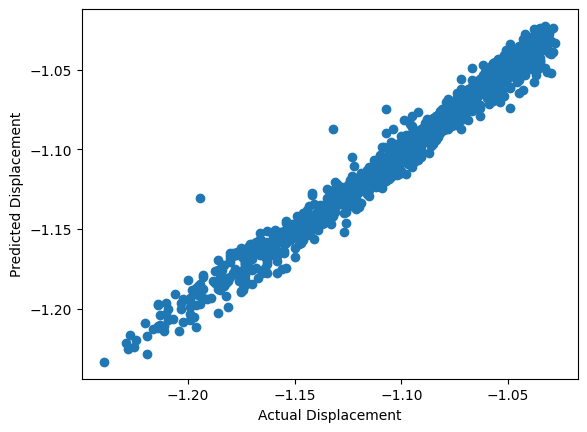

In [19]:

plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predPipeD)
print(f'Mean Squared Error: {mse:.2f}')
mae = mean_squared_error(yD_test, y_predPipeD)
print(f'Mean Absolute Error: {mae:.2f}')
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(yD_test, y_predPipeD)
print(f'Root Mean Squared Error: {mse:.2f}')


## Mass

In [20]:
mass_data = all_data.drop(columns=['Displacement1', 'Stress1'])

mass_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65
...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,177.79
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,182.40
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,168.71
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,156.86


In [22]:
XM = mass_data[['diamond','ellipse_to_front','back_hole','ellipse_to_bottom','ellipse','corner','diamond_to_back']]  # multiple features
yM = mass_data['Mass2']
XM

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718
...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900


In [23]:
# creating train and test sets 
XM_train, XM_test, yM_train, yM_test = train_test_split(XM, yM, test_size=0.3, random_state=4294967295) 
XM_train

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
1665,42.50469,36.61893,8.08296,38.12992,10.43905,28.37854,33.00908
3298,27.03313,36.01281,6.36827,33.23261,17.92542,28.88550,33.59603
1159,40.20438,25.62784,8.92328,33.50185,21.92112,25.07093,35.52426
2427,34.41511,28.66540,9.64022,34.56632,23.67905,40.36236,32.12540
2815,16.84994,21.38174,7.13900,31.57898,11.12091,44.16331,26.03544
...,...,...,...,...,...,...,...
4310,28.56821,33.89235,6.17383,34.63928,25.89579,33.43126,28.70429
3143,46.13305,34.45332,9.59585,37.97209,26.25773,23.50574,26.80588
3084,23.49270,35.64826,8.17273,31.83567,18.90538,16.05584,19.49901
290,36.91804,22.12011,9.43116,36.50395,13.59110,22.70356,31.05268


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeM = Pipeline([('polyfeatures', PolynomialFeatures(degree=4)), ('linear', LinearRegression())])
cross_val_score(pipe_M, XM_train, yM_train, cv=10)

array([0.9999646 , 0.9999625 , 0.9999559 , 0.999959  , 0.99995981,
       0.9999545 , 0.99973471, 0.99995885, 0.99995959, 0.99994466])

In [27]:
pipeM.fit(XM_train, yM_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

R-squared: 1.00
Mean Squared Error: 0.00


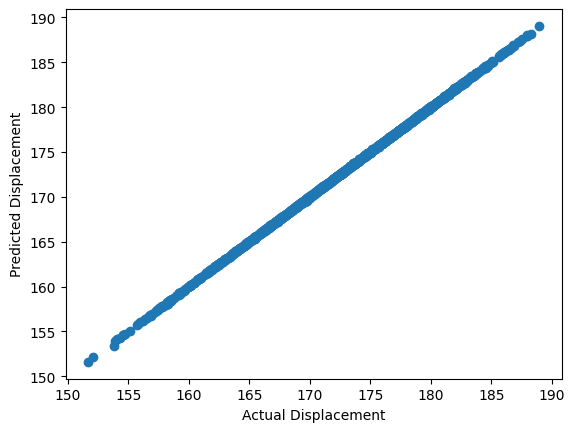

In [29]:
yM_pred_test = pipeM.predict(XM_test)
plt.scatter (yM_test, yM_pred_test)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yM_test, yM_pred_test)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yM_test, yM_pred_test)
print(f'Mean Squared Error: {mse:.2f}')

## SHAP testing displacement

In [51]:
import shap

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
shap.initjs()

In [54]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(pipeD.predict, XD_train)

# Calculate SHAP values for the model
shap_values = explainer(XD_train)

shap.force_plot(shap_values[0, :], XD_test.iloc[0, :])

ExactExplainer explainer: 3505it [14:54,  3.86it/s]                          


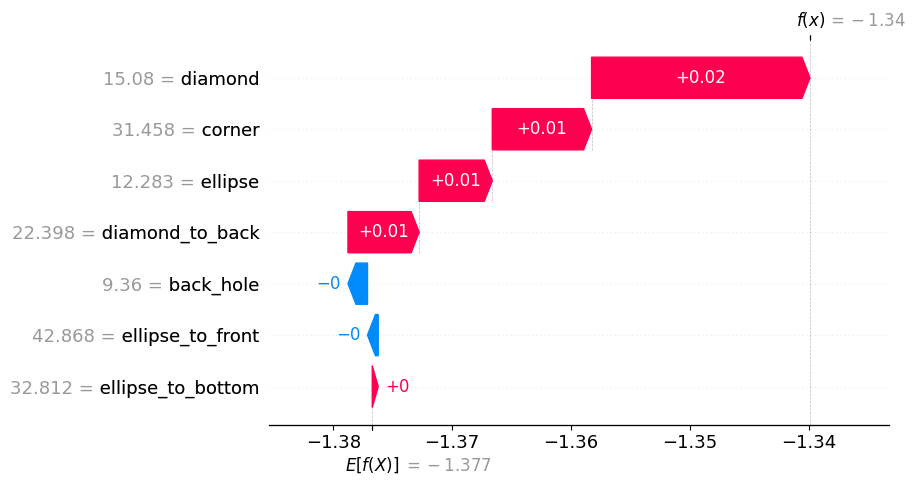

In [55]:
shap.plots.waterfall(shap_values[0, :], max_display=14)

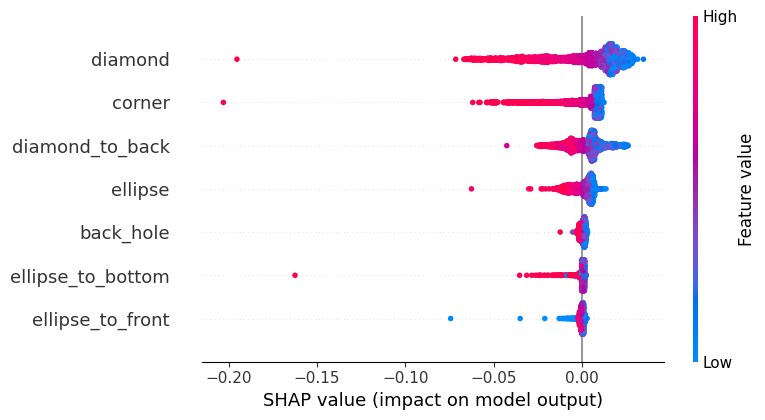

In [56]:
shap.summary_plot(shap_values, XD_train)

## SHAP Testing Mass

In [57]:
# Create a SHAP explainer for the model
explainerM = shap.Explainer(pipeM.predict, XM_train)

# Calculate SHAP values for the model
shap_valuesM = explainerM(XM_train)
)

shap.force_plot(shap_valuesM[0, :], XM_test.iloc[0, :])

ExactExplainer explainer: 3505it [01:52, 28.53it/s]                          


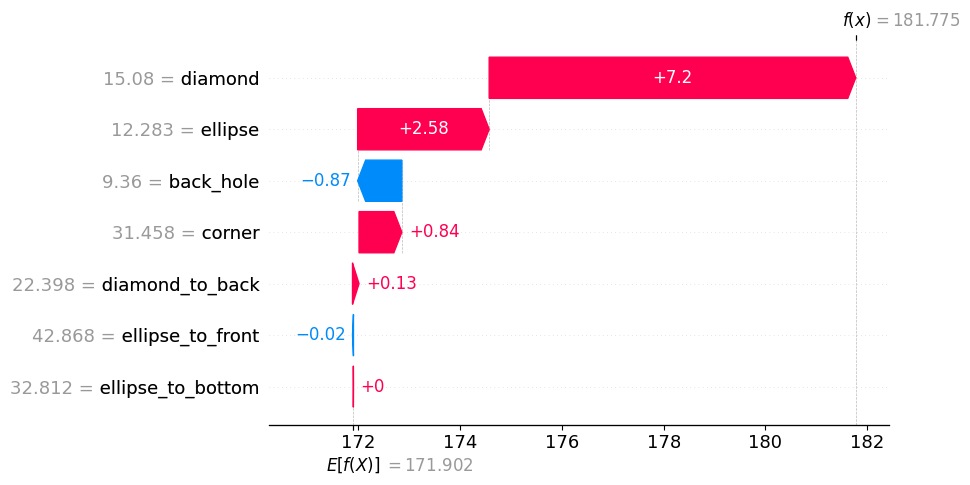

In [58]:
shap.plots.waterfall(shap_valuesM[0, :], max_display=14)

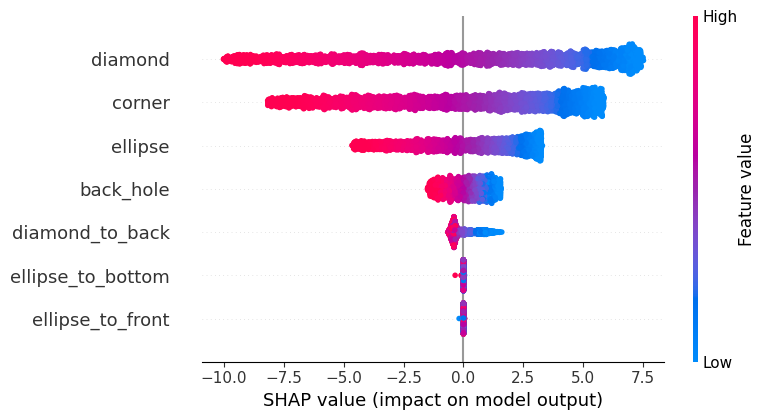

In [59]:
shap.summary_plot(shap_valuesM, XM_train)

## Genetic Algorithm

In [30]:
def F1 (GA_data1):
    df1 = pd.DataFrame(data = [GA_data1], columns = ['diamond','ellipse_to_front','back_hole','ellipse_to_bottom','ellipse','corner','diamond_to_back'])
    DispPred = pipeD.predict(df1)
    return DispPred

def F2 (GA_data2):
    df2 = pd.DataFrame(data = [GA_data2], columns = ['diamond','ellipse_to_front','back_hole','ellipse_to_bottom','ellipse','corner','diamond_to_back'])
    MassPred = pipeM.predict(df2)
    return MassPred



In [ ]:
array([39.96005636, 35.04492918,  9.99973373, 32.03989168, 29.99985368,
       47.62923635, 15.01251795])

In [31]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=7,
                         n_obj=2,
                         n_ieq_constr=0,
                         xl=np.array([15, 20, 6, 30, 9, 16, 15]),
                         xu=np.array([50, 45, 10, 40, 30, 48, 40]))

    def _evaluate(self, x, out, *args, **kwargs):   
        f1 = 0-(F1(x))
        f2 = F2(x)

        

        out["F"] = ([f1, f2])

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-02 12:11:48,090	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [44]:
problem = MyProblem()

algorithm = NSGA2(pop_size=300)

res = minimize(problem, algorithm, ("n_gen", 400), verbose=True, save_history=True, seed=1,)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      300 |     31 |             - |             -
     2 |      600 |     40 |  0.0522351579 |         ideal
     3 |      900 |     52 |  0.0189133111 |         ideal
     4 |     1200 |     67 |  0.0433912572 |         ideal
     5 |     1500 |     71 |  0.0113816881 |             f
     6 |     1800 |     87 |  0.0335216779 |         ideal
     7 |     2100 |     91 |  0.0062043249 |             f
     8 |     2400 |    113 |  0.0040710535 |             f
     9 |     2700 |    133 |  0.0033667761 |             f
    10 |     3000 |    133 |  0.0066970103 |         ideal
    11 |     3300 |    157 |  0.0023799978 |             f
    12 |     3600 |    172 |  0.0044100823 |         nadir
    13 |     3900 |    202 |  0.0016410552 |             f
    14 |     4200 |    214 |  0.0137872453 |         ideal
    15 |     4500 |    214 |  0.0014362845 |             f
    16 |     4800 |    229 |  0.0038523616 |         ide

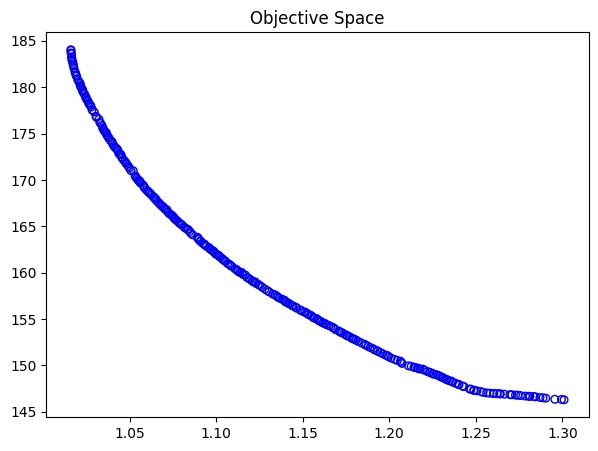

In [45]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [46]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.0160609134484186, 1.3009530635658937]
Scale f2: [146.29015197661695, 184.04602018991264]


In [47]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


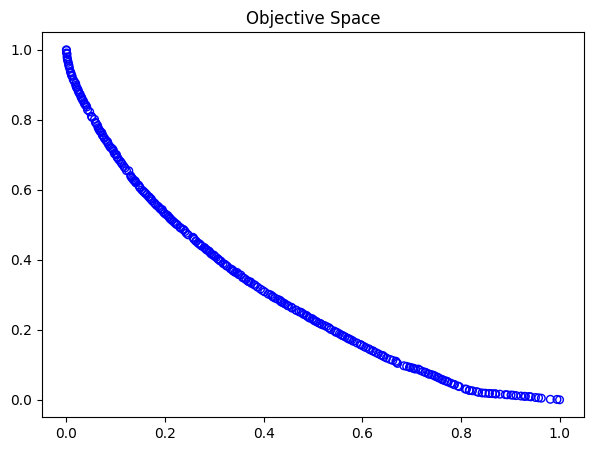

In [48]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Best regarding ASF: Point 
i = 110
F = [  1.13953566 157.0134803 ]


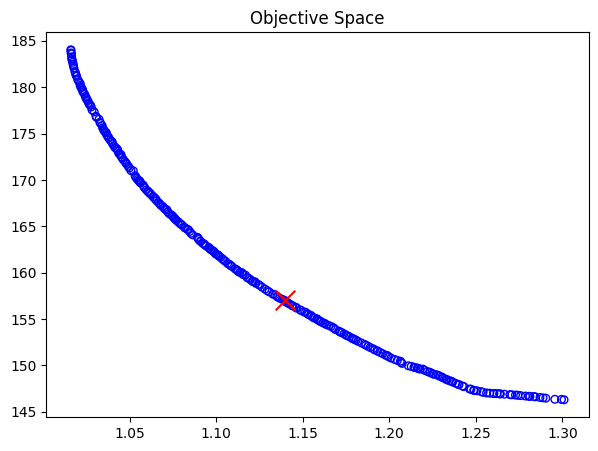

In [74]:
weights = np.array([0.396, 0.604])
from pymoo.decomposition.asf import ASF

decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()

print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [75]:
res.X[i]

array([39.96005636, 35.04492918,  9.99973373, 32.03989168, 29.99985368,
       47.62923635, 15.01251795])

In [76]:
hist = res.history
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

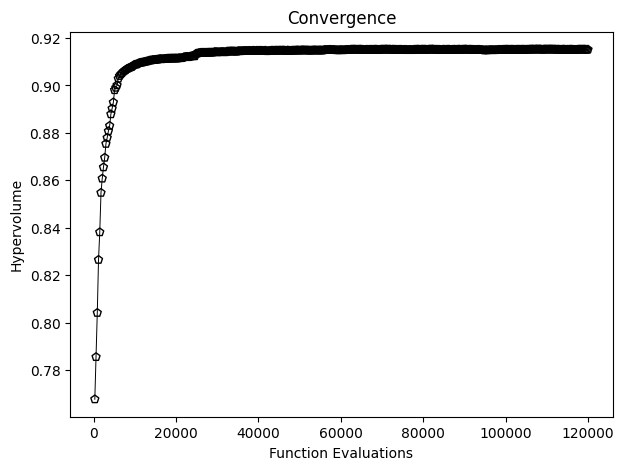

In [77]:
from pymoo.indicators.hv import Hypervolume

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()